In [2]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 18, "font.family": "serif"})



(3.7, 4.6)

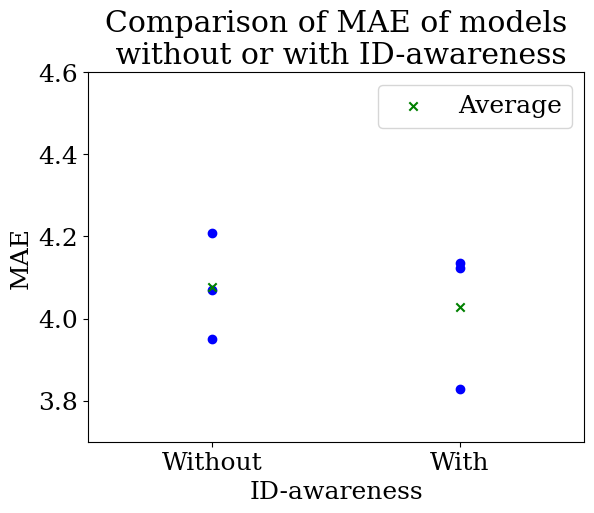

In [34]:


default_errors = [3.95006284157435, 4.06939767423429, 4.20824378766511]
id_awareness_errors = [4.1224047058507, 4.13595043680124, 3.82736308382268]


plt.scatter([1]*len(default_errors), default_errors, color="blue")
plt.scatter([2]*len(id_awareness_errors), id_awareness_errors, color="blue")

plt.scatter([1,2], [sum(default_errors)/len(default_errors),sum(id_awareness_errors)/len(id_awareness_errors)], color="green", marker="x",label="Average")

plt.title("Comparison of MAE of models\n without or with ID-awareness")
plt.ylabel("MAE")
plt.xticks([1, 2], ["Without", "With"])
plt.xlabel("ID-awareness")

plt.legend()

plt.xlim(0.5, 2.5)
plt.ylim(3.7, 4.6)

# plt.savefig("id_awareness_comparison.png")

(3.7, 4.6)

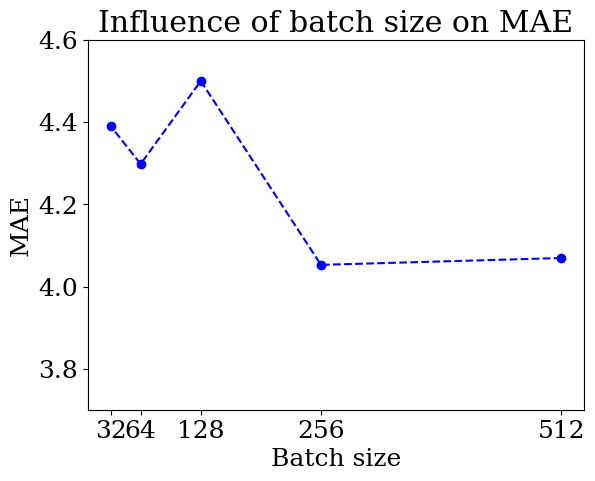

In [14]:
errors = [4.06939767423429, 4.05275434828641, 4.50049935232129, 4.29826683345593,4.39102087250927]
batch_sizes = [512,256,128,64,32]
#4.06939767423429, 4.20824378766511

plt.plot(batch_sizes, errors, "--o", color = "blue")


plt.title("Influence of batch size on MAE")
plt.ylabel("MAE")
plt.xlabel("Batch size")
# plt.xticks([1, 2], ["Default", "Default with ID-awareness"])
plt.xticks(batch_sizes, batch_sizes)
plt.ylim(3.7, 4.6)

# plt.legend()

# plt.xlim(0.5, 2.5)
# plt.savefig("batch_size_influence.png")

In [8]:
#depth 2

d2 = {(128,512):4.06939767423429,
      (64,64):4.07608581944515}

# depth 3

d3 = {(8,512) : 4.00128221729345,
 (16,256): 4.32034326754118,
 (32,128): 3.99074962032468,
 (64,64): 4.17094948484186}

# depth 4

d4 = {(64,64): 4.04289894810894}

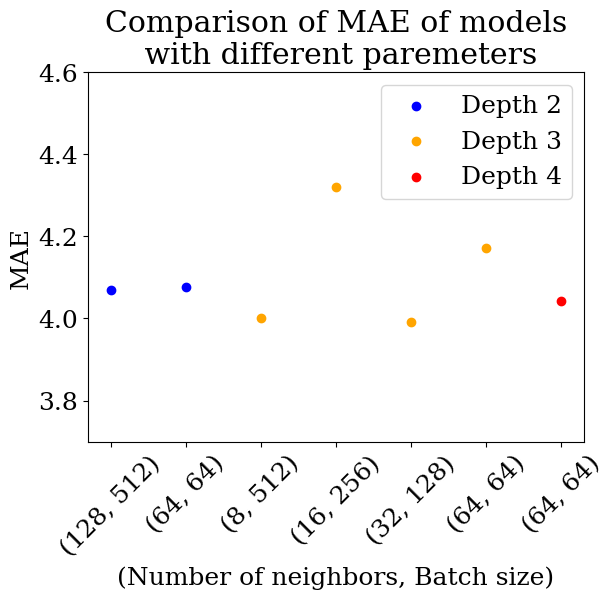

In [9]:
l2 = list(d2.values())

l3 = list(d3.values())

l4 = list(d4.values())

yy = l2+l3+l4
xx = range(len(yy))

# colors = ["red"]*len(l2)+["blue"]*len(l3)+["green"]*len(l4)
# labels = ["Depth 2"]*len(l2)+["Depth 3"]*len(l3)+["Depth 4"]*len(l4)

plt.title("Comparison of MAE of models\n with different paremeters")

plt.xticks(xx, list(d2.keys())+list(d3.keys())+list(d4.keys()), rotation=45)

plt.scatter(xx[:len(l2)], yy[:len(l2)], c="blue", label="Depth 2")
plt.scatter(xx[len(l2):len(l2)+len(l3)], yy[len(l2):len(l2)+len(l3)], c="orange", label="Depth 3")
plt.scatter(xx[len(l2)+len(l3):], yy[len(l2)+len(l3):], c="red", label="Depth 4")

plt.ylabel("MAE")
plt.xlabel("(Number of neighbors, Batch size)")

plt.ylim(3.7, 4.6)


plt.legend()

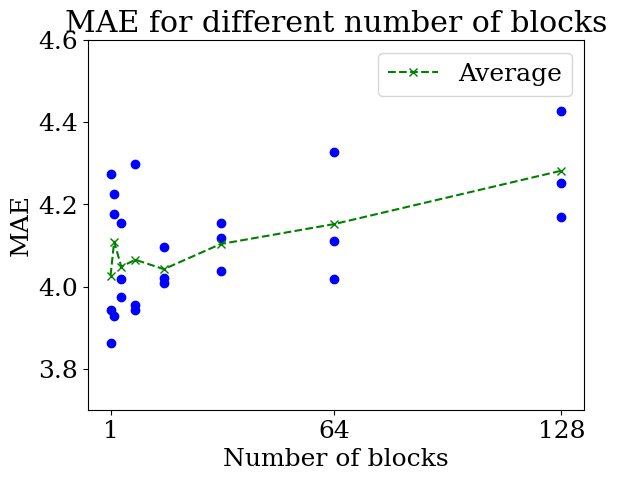

In [36]:
import pandas as pd
df = pd.read_csv("results.csv")

df = df[df["val/test"]=="test"]

df = df.sort_values(by="mae")

plt.scatter(df["num_blocks"], df["mae"], color="blue")
plt.xticks([1,64,128],[1,64,128])
plt.ylim(3.7, 4.6)
plt.title("MAE for different number of blocks")
plt.xlabel("Number of blocks")
plt.ylabel("MAE")



# group by num_blocks, avg
# df["num_blocks"] = df["num_blocks"].astype(int)
dg = df[["mae", "num_blocks"]].groupby(["num_blocks"]).mean().reset_index()

plt.plot(dg["num_blocks"], dg["mae"], "--x", label="Average", color="green")
plt.legend()



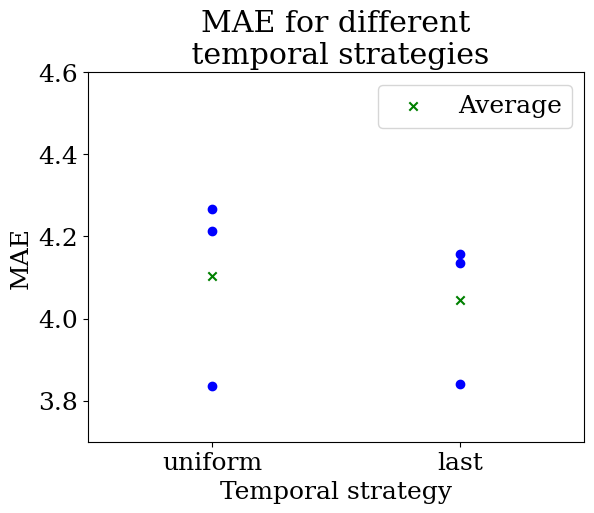

In [28]:

df = pd.read_csv("results_temporal_strategy.csv")

df = df[df["val/test"]=="test"]

df = df.sort_values(by="mae")

plt.scatter(df["temporal_strategy"], df["mae"], color="blue")
# plt.xticks([1,64,128],[1,64,128])
plt.ylim(3.7, 4.6)
plt.xlim(-0.5, 1.5)
plt.title("MAE for different\n temporal strategies")
plt.xlabel("Temporal strategy")
plt.ylabel("MAE")




# group by num_blocks, avg
# df["num_blocks"] = df["num_blocks"].astype(int)
dg = df[["mae", "temporal_strategy"]].groupby(["temporal_strategy"]).mean().reset_index()

plt.scatter(dg["temporal_strategy"], dg["mae"], marker="x", label="Average", color="green")
plt.legend()



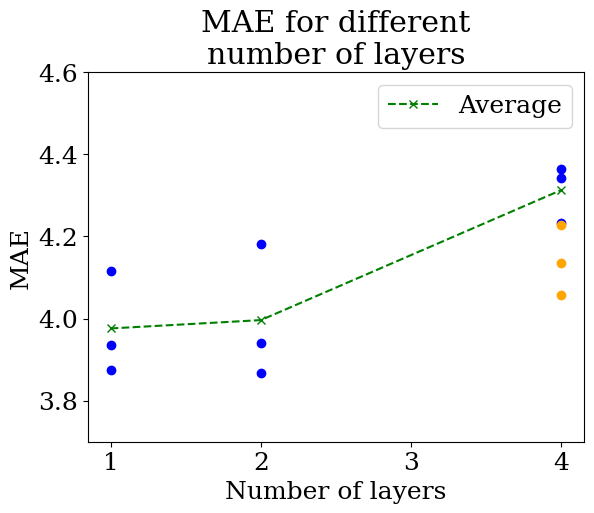

In [ ]:
import pandas as pd
df = pd.read_csv("results_num_layers.csv")

df = df[(df["val/test"]=="test") & (df["epochs"]==10)]

df = df.sort_values(by="mae")

plt.scatter(df["num_layers"], df["mae"], color="blue")



dg = df[["mae", "num_layers"]].groupby(["num_layers"]).mean().reset_index()

plt.plot(dg["num_layers"], dg["mae"], "--x", label="Average", color="green")



df = pd.read_csv("results_num_layers.csv")

df = df[(df["val/test"]=="test") & (df["epochs"]==20)]

df = df.sort_values(by="mae")

plt.scatter(df["num_layers"], df["mae"], color="orange")



plt.ylim(3.7, 4.6)
plt.title("MAE for different\nnumber of layers")
plt.xlabel("Number of layers")
plt.ylabel("MAE")
plt.legend()

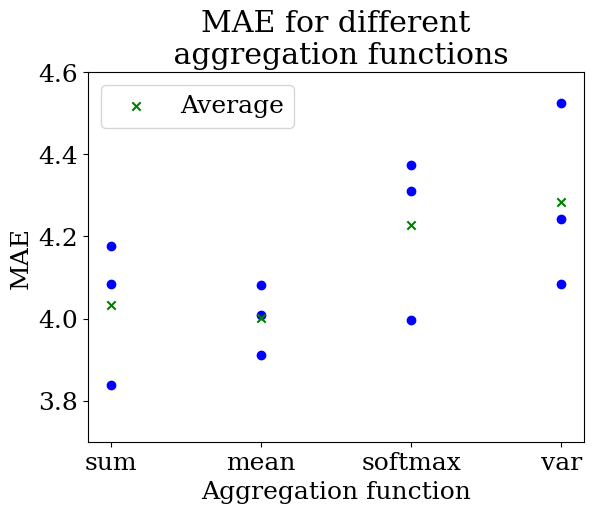

In [4]:
df = pd.read_csv("results_aggr.csv")

df = df[df["val/test"]=="test"]

df = df.sort_values(by="aggr").sort_values(by="mae")

plt.scatter(df["aggr"], df["mae"], color="blue")
plt.ylim(3.7, 4.6)
# plt.xlim(-0.5, 1.5)
plt.title("MAE for different\n aggregation functions")
plt.xlabel("Aggregation function")
plt.ylabel("MAE")




# group by num_blocks, avg
# df["num_blocks"] = df["num_blocks"].astype(int)
dg = df[["mae", "aggr"]].groupby(["aggr"]).mean().reset_index()

plt.scatter(dg["aggr"], dg["mae"], marker="x", label="Average", color="green")
plt.legend()

ValueError: Unrecognized marker style '--x'

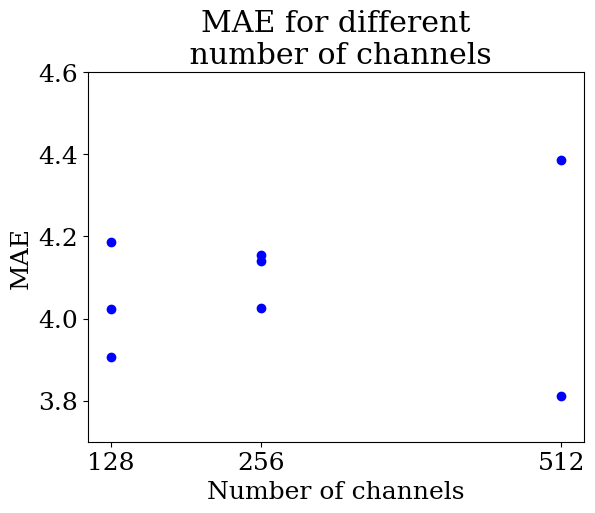

In [ ]:
setting_name = "channels"
df = pd.read_csv(f"results_{setting_name}.csv")

df = df[df["val/test"]=="test"]

df = df.sort_values(by=setting_name).sort_values(by="mae")

plt.scatter(df[setting_name], df["mae"], color="blue")
plt.ylim(3.7, 4.6)
plt.xticks([128,256,512],[128,256,512])
# plt.xlim(-0.5, 1.5)
plt.title("MAE for different\n number of channels")
plt.xlabel("Number of channels")
plt.ylabel("MAE")




# group by num_blocks, avg
# df["num_blocks"] = df["num_blocks"].astype(int)
dg = df[["mae", setting_name]].groupby([setting_name]).mean().reset_index()

plt.plot(dg[setting_name], dg["mae"], "--x", label="Average", color="green")
plt.legend()